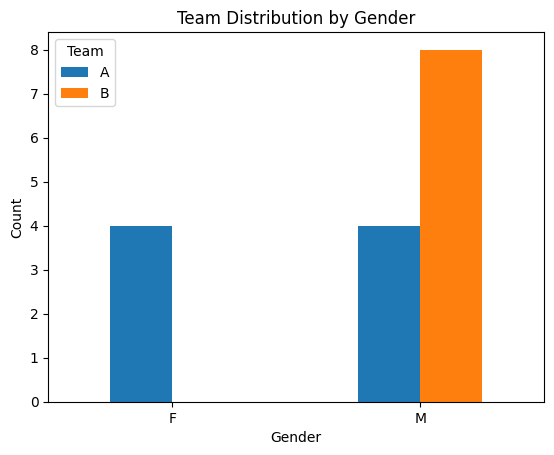

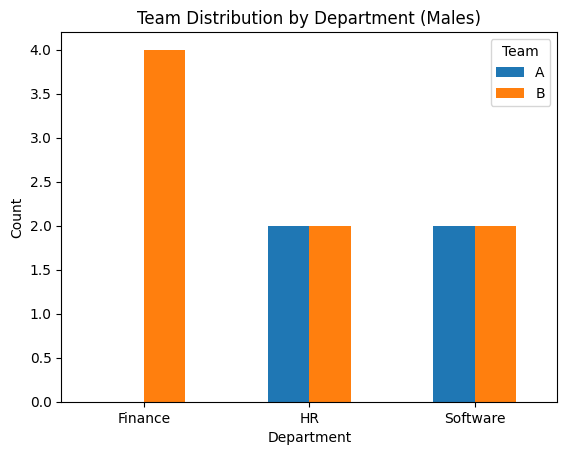

/tmp/ipython-input-1860892393.py:59: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


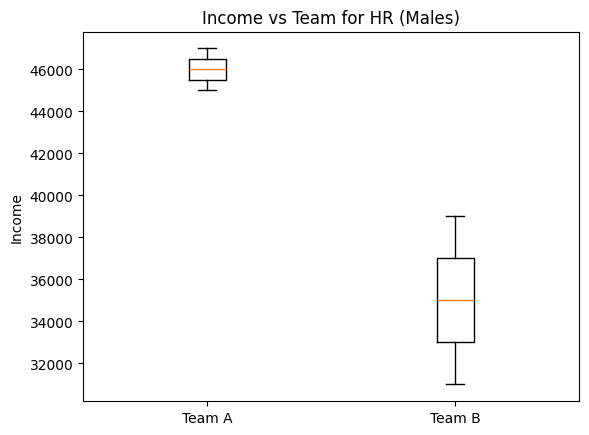

/tmp/ipython-input-1860892393.py:70: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


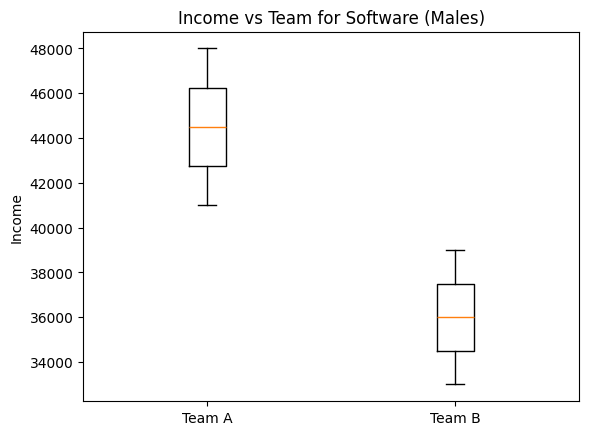

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

data = {
    "Employee ID": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16],
    "Income": [
        46000, 39000, 41000, 33000,
        30000, 49000, 41000, 48000,
        39000, 39000, 45000, 47000,
        37000, 31000, 40000, 35000
    ],
    "Gender": [
        "F", "M", "M", "M",
        "F", "M", "M", "M",
        "M", "M", "M", "M",
        "M", "M", "F", "F"
    ],
    "Department": [
        "Finance", "Finance", "Software", "Software",
        "HR", "Finance", "Finance", "Software",
        "Software", "HR", "HR", "HR",
        "Finance", "HR", "Software", "HR"
    ],
    "Team": [
        "A", "B", "A", "B",
        "A", "B", "B", "A",
        "B", "B", "A", "A",
        "B", "B", "A", "A"
    ]
}
df =  pd.DataFrame(data)
df
gender_team = pd.crosstab(df['Gender'], df['Team'])

gender_team.plot(kind='bar')
plt.title("Team Distribution by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()

#All female employees belong to Team A, whereas male employees are distributed across both teams. Therefore, Gender is chosen as the root split.

male_df = df[df['Gender'] == 'M']

dept_team = pd.crosstab(male_df['Department'], male_df['Team'])

dept_team.plot(kind='bar')
plt.title("Team Distribution by Department (Males)")
plt.xlabel("Department")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()

#Among male employees, Finance maps exclusively to Team B, while HR and Software require further splitting.

hr = male_df[male_df['Department'] == 'HR']

plt.boxplot(
    [hr[hr['Team'] == 'A']['Income'],
     hr[hr['Team'] == 'B']['Income']],
    labels=['Team A', 'Team B']
)
plt.title("Income vs Team for HR (Males)")
plt.ylabel("Income")
plt.show()

sw = male_df[male_df['Department'] == 'Software']

plt.boxplot(
    [sw[sw['Team'] == 'A']['Income'],
     sw[sw['Team'] == 'B']['Income']],
    labels=['Team A', 'Team B']
)
plt.title("Income vs Team for Software (Males)")
plt.ylabel("Income")
plt.show()

#Income separates Team A and Team B at approximately ₹40,000 for both HR and Software departments.

def predict_team(gender, department, income):
    if gender == 'F':
        return 'A'

    if department == 'Finance':
        return 'B'

    if department in ['HR', 'Software']:
        if income < 40000:
            return 'B'
        else:
            return 'A'